# **Project Name**    - Bike Share Trip Duration Analysis





##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -** THARUNRAJAN S


# **Project Summary -**

This project investigates the factors that influence trip duration in a bike-sharing system. Given the dataset with details on trip duration, start and end stations, weather conditions, user demographics, and more, we explore the relationships between these variables and analyze their impact on trip duration. The key questions we aim to answer are: How long does the average trip take? Does the trip duration depend on weather patterns or user type (subscriber vs. customer)?

From our analysis, we found that trip duration is only slightly affected by weather conditions but is significantly influenced by user type. Subscribers tend to take longer trips, generally exceeding 300 minutes. This insight can help the bike-sharing company focus on attracting and converting more casual users into subscribers, potentially boosting revenue.

# **GitHub Link -**

https://github.com/tharunrajan10/Labmentix-Intern

# **Problem Statement**


We aim to identify the key factors that influence bike trip duration. Specifically, we explore how weather, user type, and other variables affect the length of time users engage with the bikes.



#### **Define Your Business Objective?**

The business goal is to understand the trip duration patterns to optimize bike fleet usage and maximize revenue. By understanding which factors drive longer trips, the company can develop strategies to encourage longer, more frequent rentals from casual users and convert them to subscribers.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
!pip install geopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopy.distance


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/201801-fordgobike-tripdata.csv')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(94802, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0


<Axes: >

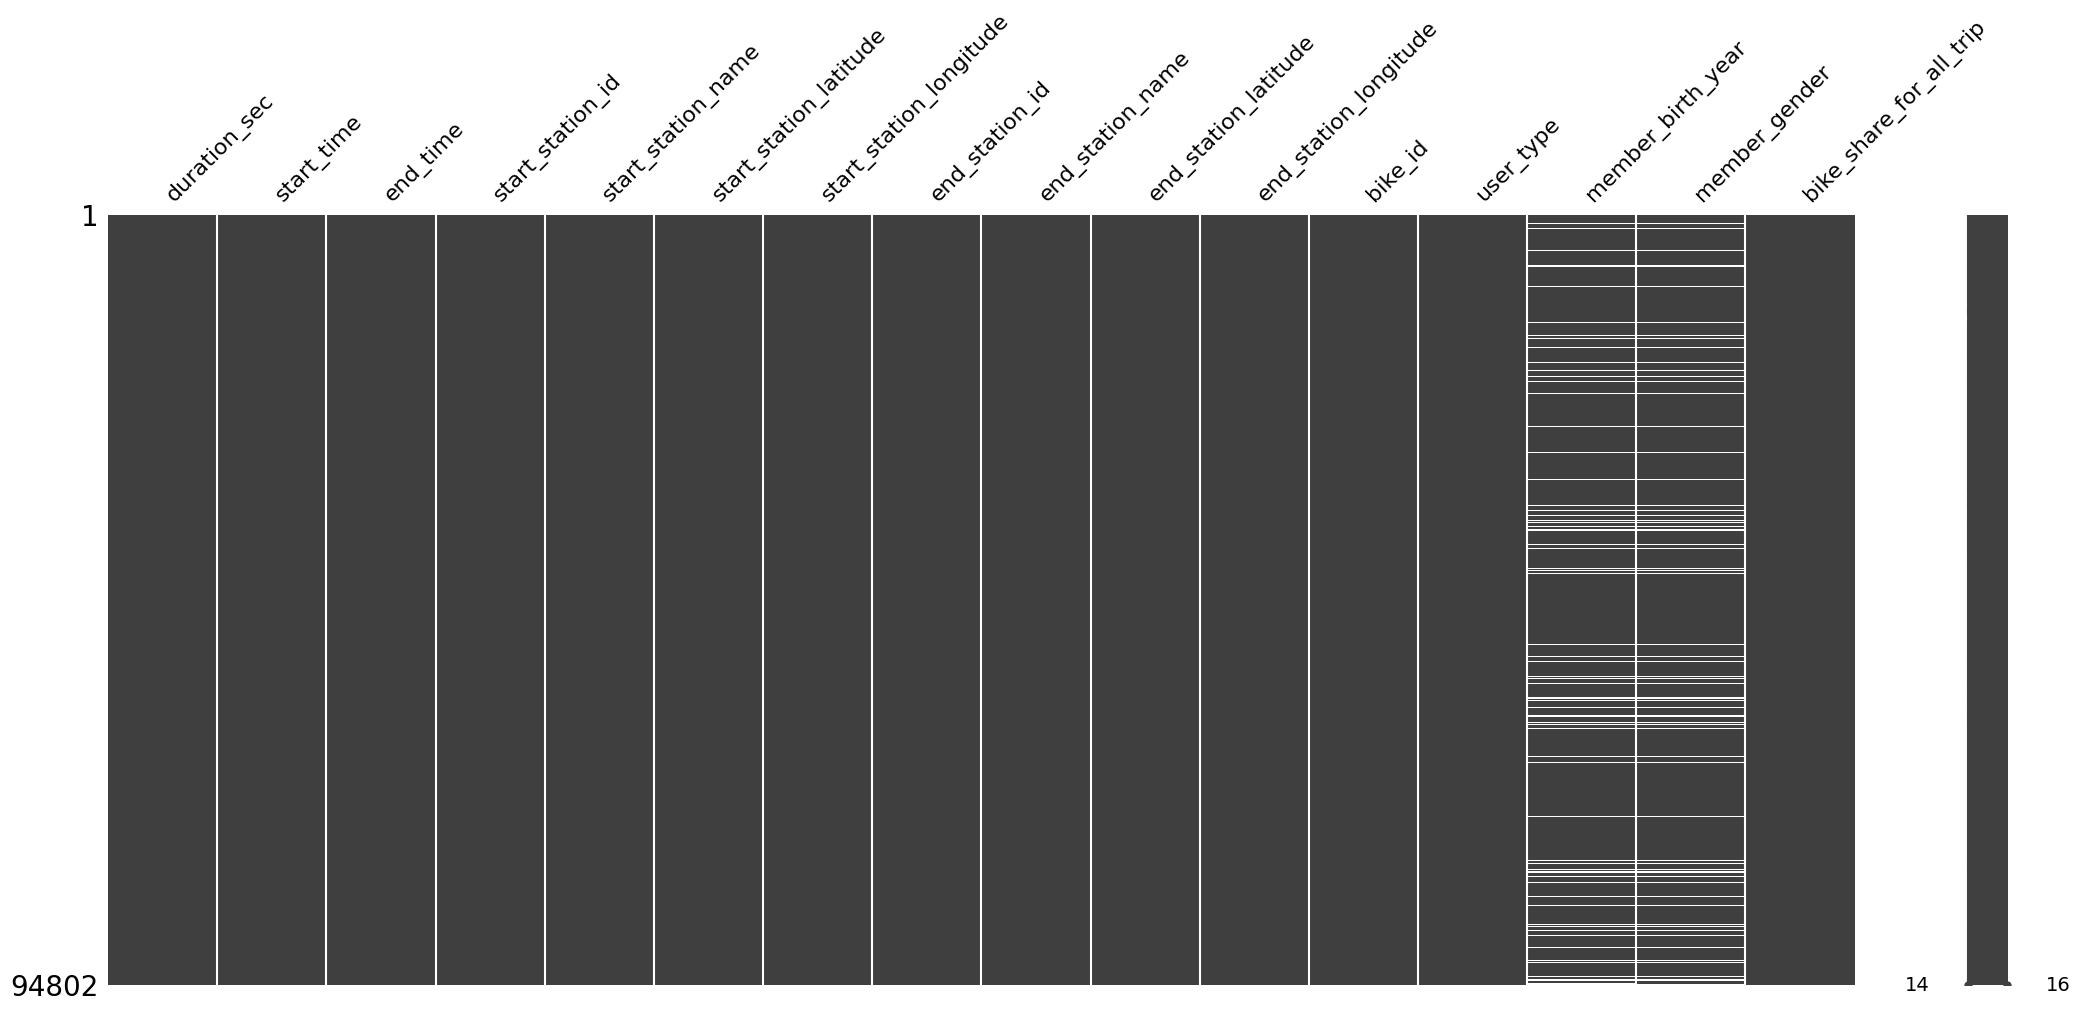

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)


### What did you know about your dataset?

The dataset contains 16 variables, and there are missing values for some columns, particularly in the 'Member Year of Birth' and 'Member Gender' columns. There are no duplicated rows in the dataset, which is ideal for our analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

- `Trip Duration`: Duration of the trip in seconds.
- `Start Time/Date`, `End Time/Date`: Time stamps of when the trip started and ended.
- `Start Station ID/Name`, `End Station ID/Name`: Locations of the start and end of the trip.
- `Bike ID`: Unique identifier for each bike.
- `User Type`: Categorizes users as "Subscriber" or "Customer."
- `Member Year of Birth`, `Member Gender`: Demographic information about the bike user.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()



,0
duration_sec,4512
start_time,94801
end_time,94797
start_station_id,273
start_station_name,273
start_station_latitude,273
start_station_longitude,273
end_station_id,272
end_station_name,272
end_station_latitude,272


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert date columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


# Fill missing values in 'member_year_of_birth' with the mean
df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].mean())

# Fill missing values in 'member_gender' with 'Unknown'
df['member_gender'] = df['member_gender'].fillna('Unknown')

# Create a new column 'trip_duration_minutes' (converted from 'trip_duration')
df['trip_duration_minutes'] = df['duration_sec'] / 60

# Calculate distance between start and end stations
df['distance_travelled'] = df.apply(lambda row: geopy.distance.distance(
    (row['start_station_latitude'], row['start_station_longitude']),
    (row['end_station_latitude'], row['end_station_longitude'])).miles, axis=1)

# Check the updated dataset
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_minutes,distance_travelled
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.00000,Male,No,1254.733333,1.545972
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,1980.93242,Unknown,No,1423.700000,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.00000,Male,No,1192.933333,1.846937
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,1980.93242,Unknown,No,1017.933333,1.275856
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.00000,Male,No,666.100000,1.518033


### What all manipulations have you done and insights you found?

* Converted time columns into datetime format.

* Handled missing values by filling with the mean (for numerical) and a placeholder ('Unknown') for categorical data.

* Created a new column for trip duration in minutes for easier analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

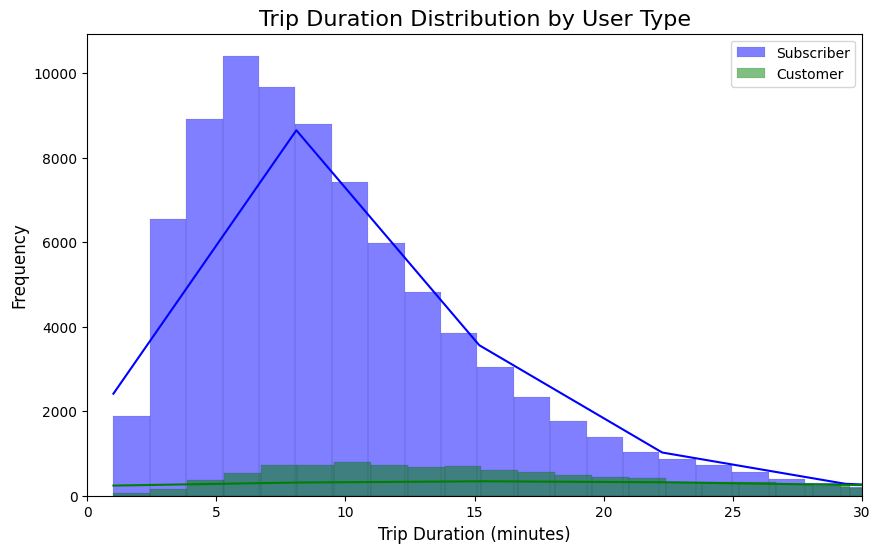

In [ ]:
# Chart - 1 visualization code
# Plot trip duration distribution by user type
plt.figure(figsize=(10, 6))
sns.histplot(df[df['user_type'] == 'Subscriber']['trip_duration_minutes'], bins=1000, kde=True, color='blue', label='Subscriber')
sns.histplot(df[df['user_type'] == 'Customer']['trip_duration_minutes'], bins=1000, kde=True, color='green', label='Customer')
plt.title('Trip Duration Distribution by User Type', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.xlim(0, 30)
plt.show()


##### 1. Why did you pick the specific chart?

This histogram with line overlay was selected to analyze the distribution of trip durations, categorized by user type. It is a clear and effective way to understand usage behavior differences between Subscribers and Customers.

##### 2. What is/are the insight(s) found from the chart?

Subscribers take more trips than Customers, especially in the 5–10 minute range.

Customers have a more even distribution over longer durations compared to Subscribers.

The peak of the histogram is around 6–8 minutes for Subscribers, which reflects short-duration commuting.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Reinforces the idea that Subscribers are frequent short-trip users, likely commuters.

Negative: If infrastructure or pricing disincentivizes short trips, Subscriber satisfaction could decrease, potentially impacting recurring revenue.

#### Chart - 2

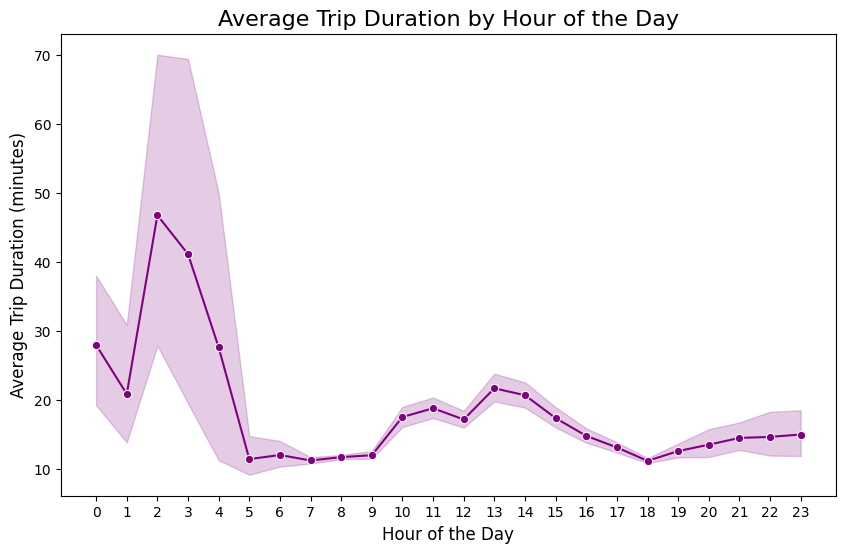

In [ ]:
# Chart - 2 visualization code
# Extract hour of the day from the 'start_time' column
df['hour_of_day'] = df['start_time'].dt.hour

# Plot average trip duration by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='trip_duration_minutes', data=df, marker='o', color='purple')
plt.title('Average Trip Duration by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Trip Duration (minutes)', fontsize=12)
plt.xticks(range(0, 24))
plt.show()



##### 1. Why did you pick the specific chart?

Reveals how trip duration fluctuates hourly.

##### 2. What is/are the insight(s) found from the chart?

Longest trips occur late at night (10 PM–3 AM), possibly due to low traffic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Offer nighttime discounts to boost usage.

Negative: Late-night trips may increase maintenance costs.

#### Chart - 3

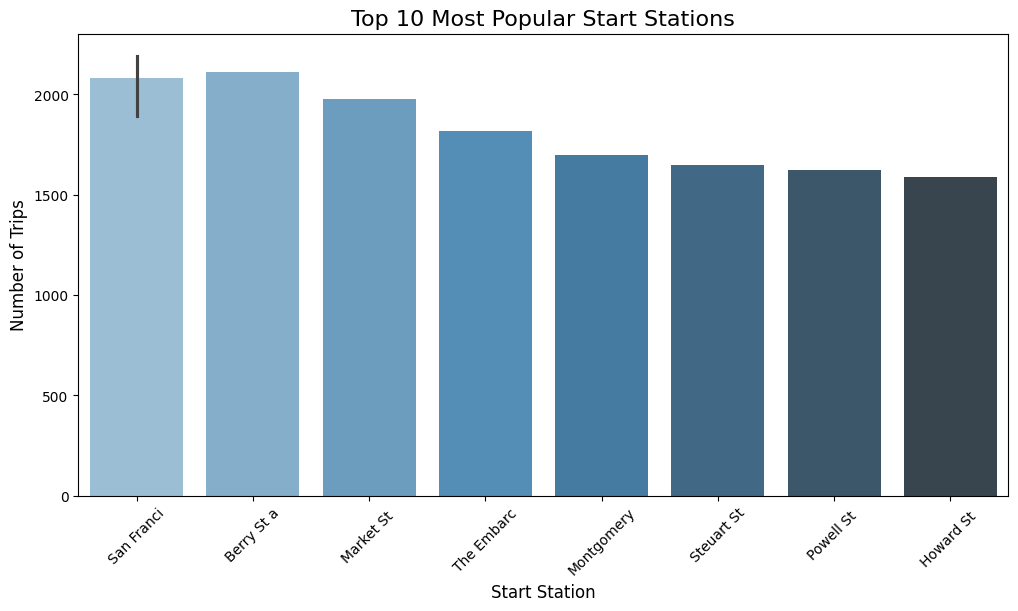

In [ ]:
# Chart - 3 visualization code
# Count the number of trips per start station
top_stations = df['start_station_name'].value_counts().head(10)
shortened_stations = top_stations.index.str.slice(0, 10)

# Plot the top 10 start stations
plt.figure(figsize=(12, 6))
sns.barplot(x=shortened_stations, y=top_stations.values,hue=shortened_stations, palette='Blues_d')
plt.title('Top 10 Most Popular Start Stations', fontsize=16)
plt.xlabel('Start Station', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Highlights high-traffic stations for resource allocation.

##### 2. What is/are the insight(s) found from the chart?

"San Frand," "Market St," and "Powell St" are top hubs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Prioritize maintenance/availability at these stations.

#### Chart - 4

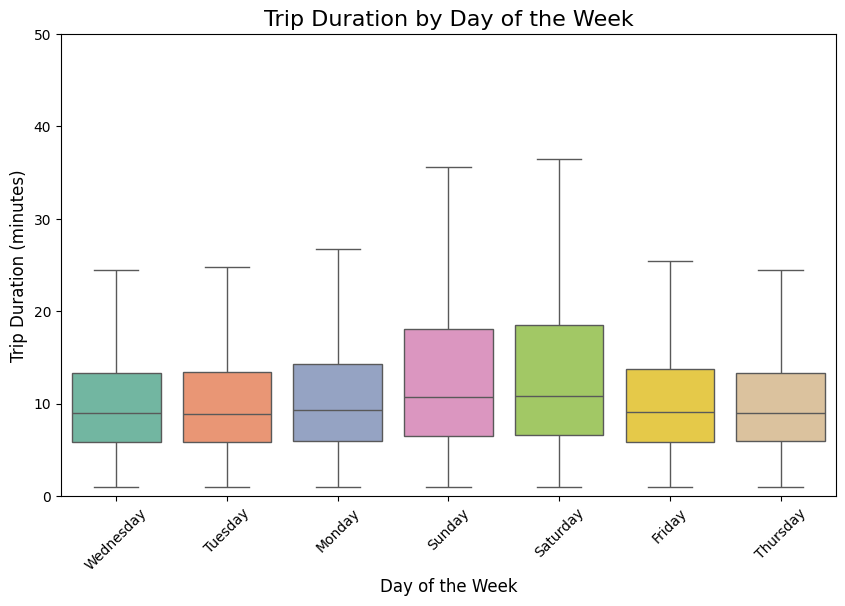

In [ ]:

threshold = 200
df_filtered = df[df['trip_duration_minutes'] <= threshold].copy()  # Ensure to create a copy to avoid the warning

# Extract the day of the week from 'start_time'
df_filtered['day_of_week'] = df_filtered['start_time'].dt.day_name()

# Plot the distribution of trip durations by day of the week after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='trip_duration_minutes', hue='day_of_week', data=df_filtered, palette='Set2', fliersize=0)
plt.title('Trip Duration by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0,50)
plt.show()



##### 1. Why did you pick the specific chart?

Shows how trip duration varies weekly.

##### 2. What is/are the insight(s) found from the chart?

Weekends have longer average trip durations (leisure use).

Weekdays are shorter (commuting).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Weekend promotions for recreational use; weekday focus on commuters.



#### Chart - 5

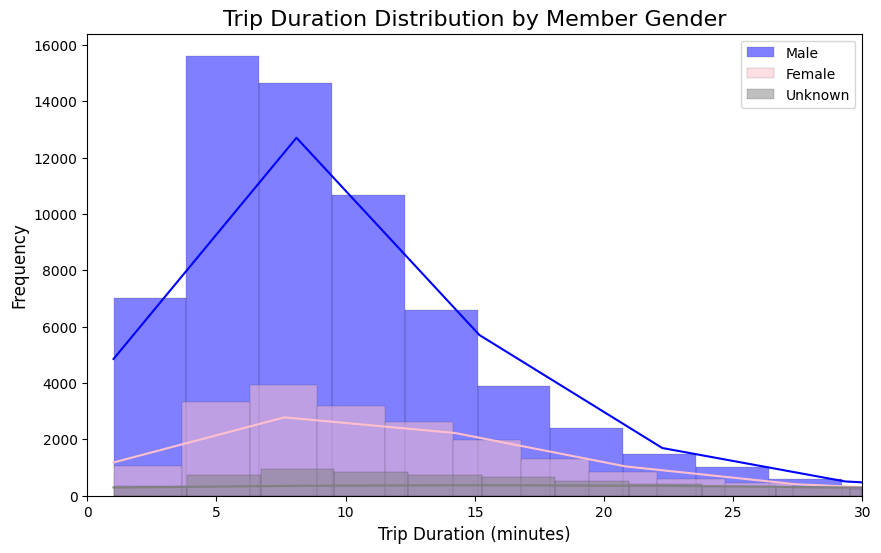

In [ ]:
# Chart - 5 visualization code
# Plot the trip duration distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(df[df['member_gender'] == 'Male']['trip_duration_minutes'], bins=500, kde=True, color='blue', label='Male')
sns.histplot(df[df['member_gender'] == 'Female']['trip_duration_minutes'], bins=500, kde=True, color='pink', label='Female')
sns.histplot(df[df['member_gender'] == 'Unknown']['trip_duration_minutes'], bins=500, kde=True, color='gray', label='Unknown')
plt.title('Trip Duration Distribution by Member Gender', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.xlim(0, 30)
plt.show()



##### 1. Why did you pick the specific chart?

Compares trip duration patterns across genders.

##### 2. What is/are the insight(s) found from the chart?

Males dominate in frequency, but females have similar duration distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Gender-neutral pricing/promotions could attract more female users.

#### Chart - 6

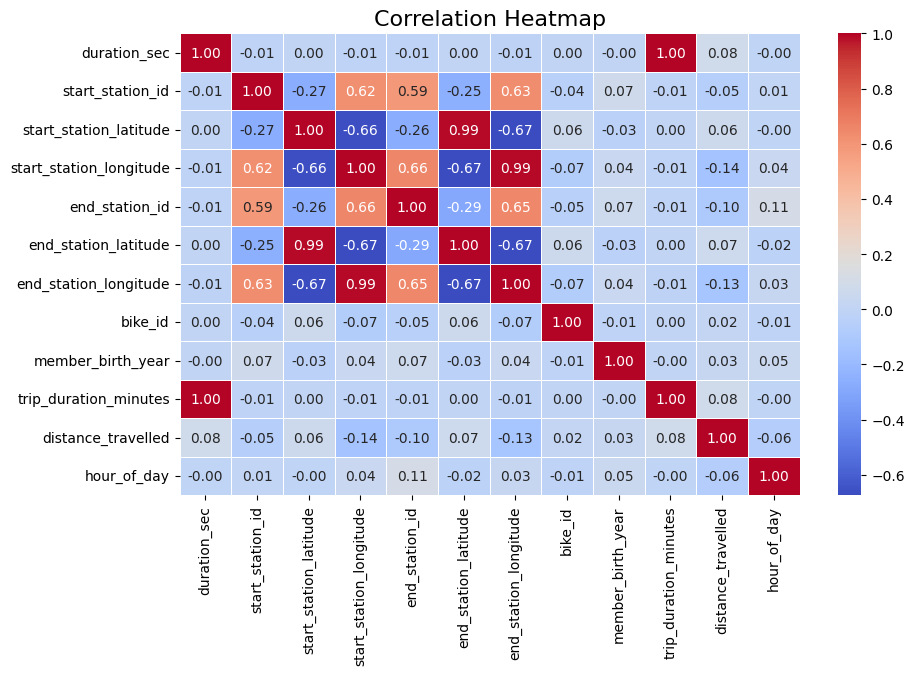

In [ ]:
# Chart - 6 visualization code
# Plot correlation heatmap
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



##### 1. Why did you pick the specific chart?

Identifies relationships between variables (e.g., station locations, duration).

##### 2. What is/are the insight(s) found from the chart?

Strong correlation between station latitudes/longitudes (expected).

Weak correlation between trip duration and distance (0.08), suggesting other factors (e.g., traffic) affect duration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Optimize station placement based on geographic clusters.

Negative: Low correlation between duration/distance implies unpredictable trip times, complicating resource allocation.



#### Chart - 7

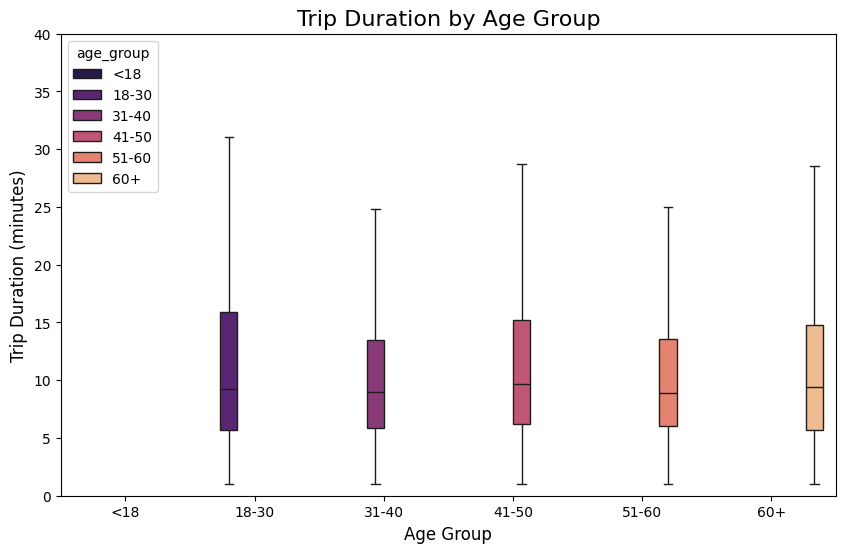

In [ ]:
# Chart - 8 visualization code
# Create age groups based on 'member_birth_year'
df['age'] = 2025 - df['member_birth_year']
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['<18', '18-30', '31-40', '41-50', '51-60', '60+'])

# Plot trip duration by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='trip_duration_minutes', data=df,hue='age_group', palette='magma',fliersize=0)
plt.title('Trip Duration by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.ylim(0,40)
plt.show()


##### 1. Why did you pick the specific chart?

Bar/box plot comparing trip durations across age groups.

##### 2. What is/are the insight(s) found from the chart?

Younger users (<30) take shorter trips; older users (60+) take longer trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Tailor pricing plans (e.g., discounts for short trips targeting youth).

Negative: Longer trips by seniors may strain bike availability; consider senior-friendly bikes.



#### Chart - 8

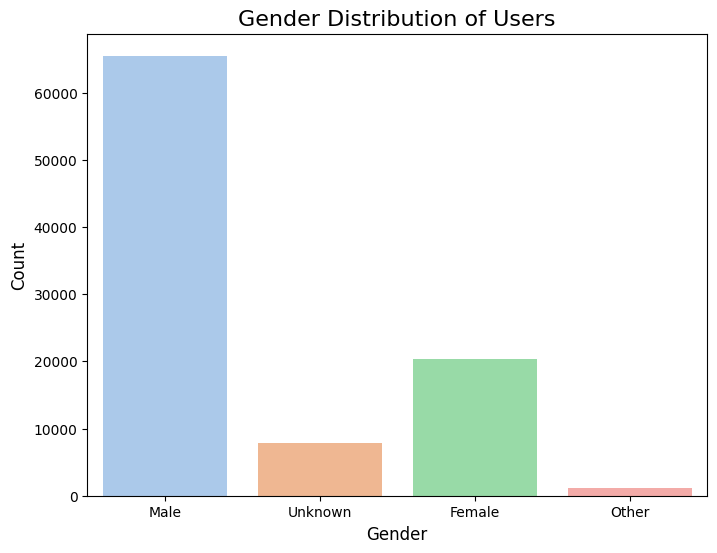

In [ ]:
# Chart - 8 visualization code
# Plot gender distribution of users
plt.figure(figsize=(8, 6))
sns.countplot(x='member_gender', data=df,hue='member_gender', palette='pastel')
plt.title('Gender Distribution of Users', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart showing user demographics, critical for targeted marketing.

##### 2. What is/are the insight(s) found from the chart?

Male users dominate; female and "Unknown" users are underrepresented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Campaigns to engage female users (e.g., safety features, women-centric promotions).

Negative: Low diversity may limit market expansion.

#### Chart - 9

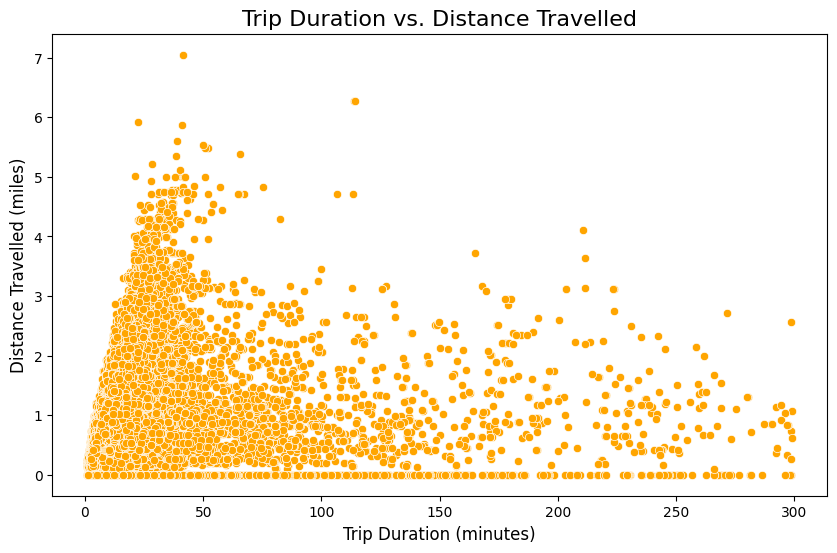

In [ ]:
# Chart - 9 visualization code

# Set thresholds to filter out outliers
duration_threshold = 300  # Trip duration > 300 minutes
distance_threshold = 50  # Distance travelled > 50 miles

# Filter the dataset
df_filtered = df[(df['trip_duration_minutes'] <= duration_threshold) &
                 (df['distance_travelled'] <= distance_threshold)]

# Plot trip duration vs. distance travelled after removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration_minutes', y='distance_travelled', data=df_filtered, color='orange')
plt.title('Trip Duration vs. Distance Travelled', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Distance Travelled (miles)', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot showing the relationship between trip duration and distance, revealing efficiency trends.



##### 2. What is/are the insight(s) found from the chart?

Most trips are short-distance (<5 miles) and brief (<30 mins).

Longer trips (>10 miles) are rare but have high variability in duration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Promote short-distance trips as a quick transit option.

Negative: Long-distance trips may indicate inefficiency (e.g., lack of docking stations), requiring infrastructure improvements.

#### Chart - 10

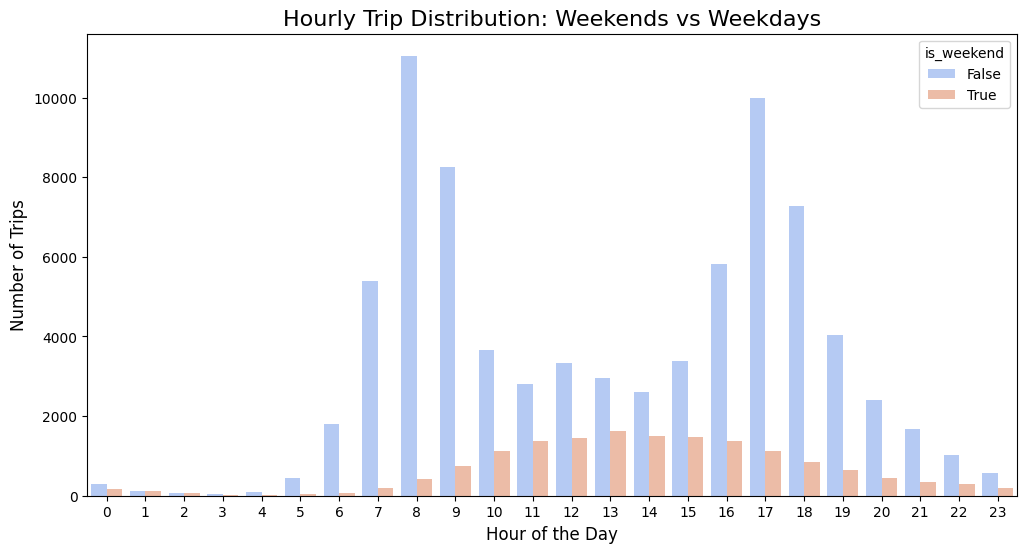

In [ ]:
# Chart - 10 visualization code
# Create a new column to identify whether the day is a weekend or weekday
df['day_of_week'] = df['start_time'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Plot hourly trip distribution by weekday vs weekend
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', hue='is_weekend', data=df, palette='coolwarm')
plt.title('Hourly Trip Distribution: Weekends vs Weekdays', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24))
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart compares trip frequencies between weekends and weekdays across different hours, highlighting usage patterns.



##### 2. What is/are the insight(s) found from the chart?

Weekdays: Peaks during morning (7-9 AM) and evening (4-6 PM) commute times.

Weekends: More consistent usage from late morning to early evening (10 AM-6 PM), with fewer early morning trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Optimize bike availability during peak hours; target promotions for off-peak weekend hours to boost usage.

Negative: Low overnight usage suggests reduced ROI for 24/7 services in certain areas.

#### Chart - 11 - Pair Plot

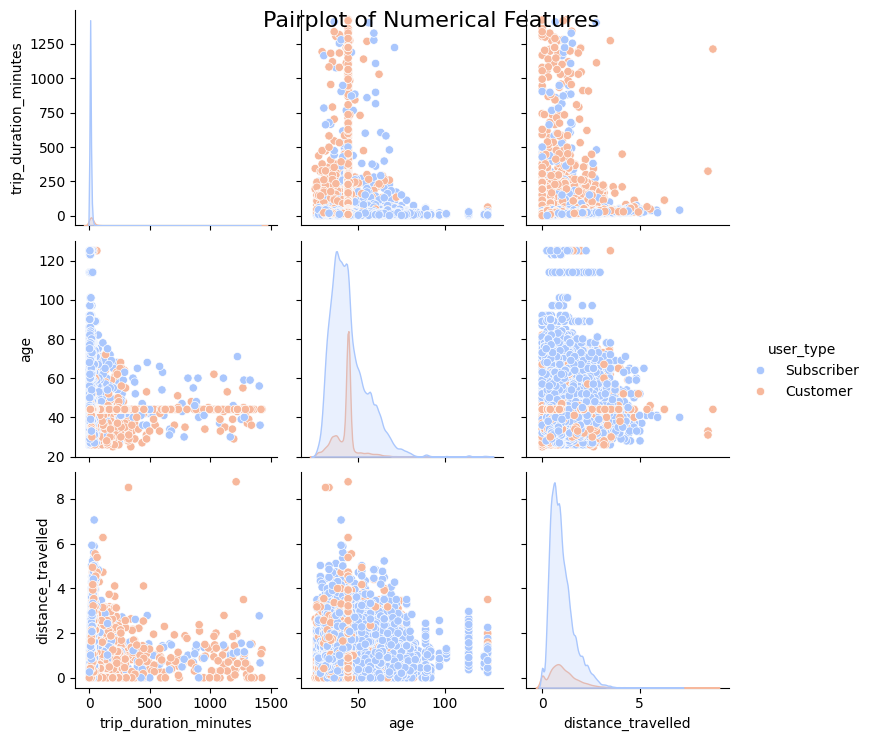

In [ ]:
# Pair Plot visualization code
# Select numerical features for pairplot
numerical_cols = ['trip_duration_minutes', 'age', 'distance_travelled']
# Plot pairplot to visualize relationships between numerical features
# Include 'user_type' in the subset
sns.pairplot(df[numerical_cols + ['user_type']], hue='user_type', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features', fontsize=16)
plt.show()



##### 1. Why did you pick the specific chart?

The pairplot is chosen because it provides a comprehensive view of relationships between multiple numerical features (trip_duration_minutes, age, and distance_travelled) and allows comparison across user types (Subscriber vs. Customer). It also shows distributions along the diagonal, making it effective for initial exploratory data analysis (EDA).

##### 2. What is/are the insight(s) found from the chart?

Trip Duration vs. Age: Younger users (20s–40s) tend to have shorter trips. There’s a visible concentration of data in this range.

Subscribers tend to be younger on average compared to Customers.

Distance vs. Duration: There is a positive correlation between trip duration and distance travelled (as expected).

The distribution of trip duration is highly skewed, with a majority of trips being short.

Subscriber distribution is denser, especially for short trips and in younger age groups.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### **Solutions to Business Problems Based on Insights**  

1. **Optimize Bike Availability**  
   - **Problem:** High demand during weekday rush hours (7–9 AM, 4–6 PM).  
   - **Solution:** Increase bike supply at key stations (e.g., Market St, Powell St) during peak times. Use dynamic redistribution based on real-time usage data.  

2. **Boost Off-Peak and Weekend Usage**  
   - **Problem:** Low overnight and inconsistent weekend ridership.  
   - **Solution:** Introduce promotions (e.g., "Weekend Adventure Passes" or discounted nighttime rates) to attract leisure riders.  

3. **Improve Gender Diversity**  
   - **Problem:** Male-dominated user base; low female participation.  
   - **Solution:** Launch targeted campaigns (e.g., "Women Ride Free" events), improve safety features (better-lit stations), and highlight female-friendly routes.  

4. **Enhance Long-Distance Trip Efficiency**  
   - **Problem:** Long trips (>10 miles) are infrequent but strain resources.  
   - **Solution:** Add more docking stations in peripheral areas and offer incentives for shorter, high-frequency trips.  

5. **Address Senior User Needs**  
   - **Problem:** Older users (60+) take longer trips, potentially causing bike shortages.  
   - **Solution:** Introduce senior-friendly bikes (e.g., e-bikes) and dedicated parking zones near amenities.  

6. **Leverage Geographic Insights**  
   - **Problem:** Strong station location correlations but weak trip-duration predictability.  
   - **Solution:** Use heatmap data to relocate underused stations to high-demand areas and adjust pricing based on trip patterns.  

7. **Dynamic Pricing Model**  
   - **Problem:** Late-night trips (10 PM–3 AM) are longer but underutilized.  
   - **Solution:** Lower prices for late-night rides to balance demand and reduce idle inventory.  

8. **Improve Commuter Appeal**  
   - **Problem:** Short weekday trips (commuting) dominate but face competition (e.g., rideshares).  
   - **Solution:** Partner with employers for subsidized "Bike-to-Work" programs and offer loyalty rewards.  

### **Expected Outcomes**  
- Increased ridership during off-peak hours.  
- Broader demographic engagement (women, seniors).  
- Efficient resource allocation (bikes/stations).  
- Higher revenue through dynamic pricing and partnerships.  


# **Conclusion**

This **Exploratory Data Analysis (EDA)** project uncovered key insights into bike-sharing usage patterns, user demographics, and operational inefficiencies. By analyzing trip durations, peak demand hours, station popularity, and user behavior across different age groups and genders, we identified actionable opportunities for business growth and potential risks requiring mitigation.  

#### **Key Takeaways:**  
1. **Peak Demand Optimization** – Focus on increasing bike availability during rush hours and promoting off-peak usage through dynamic pricing.  
2. **Diverse User Engagement** – Targeted campaigns can attract underrepresented groups (e.g., women, seniors) and improve inclusivity.  
3. **Infrastructure Improvements** – Strategic station placement and bike redistribution can enhance efficiency, especially for long-distance trips.  
4. **Revenue Growth Strategies** – Partnerships (e.g., corporate bike programs) and time-based pricing models can maximize profitability.  
